# Portfolio Optimisation

## About the Project

* Investing in stock markets can be tricky at times. That’s why this team has created a framework which will help Investors to select few companies from NIFTY 500 and will advise how much to allocate in each companies. To get chosen few, these NIFTY 500 will go under two rigorous filters, Technical Filter (Spotting RSI Divergence) & Fundamental Filter (selecting companies with best financials metrics). Later, rundown of these companies will go into Hierarchical Risk Parity model, giving the optimum allocation for each stock. Hence this is an effort to create a most efficient portfolio for the investors.

## About the Experiments

* Thus after sucessfully desigining this framework, we have tried to conduct several experiments to see whether the investing according to this framework is fruitful or not.
* Hence for this experiments we have considered 4 years cycle (i.e. 2018-19, 2019-20, 2020-21 & 2021-22).
    * Each cycle start with April 30 for the year .
    * We are taking April 30, because we feel that by the end of April 30, most of the NIFTY 500 companies publishes their annual statement. These statements will of usefull when we see try to filter companies with selected fundamental metrics.

**Flow of the Framework**
* Two Rigorous Filters
    * Technical Filter
        * First the list of 500 companeis will undergo a technical filter, which will try to indentity if the stock in question is witnessing a divergence breakout or not and whethere we are seeing a reversal or not.
        * To check for the divergence we have defined a two window, under which we will check where the divergence is happening or not and where there is a breakout or not.
    * Fundamental Filter
        * Later, the rundown of these technical filtered companies will undergo a fundamnetal filter which will short list the companies on the basis of the metric we have selected
            * For this Experiments we are considering the following metrics.
                * For Non-Financial Companies:
                    * Operating Profit Margin >= 5%
                    * Cash flow from Operation > 0 (Should be positive)
                    * Net Cash Flow > 0 (Should be positive)
                    * Debt/ Total Asset < 40%
                    * Other Income/Total revenue < 10%
                    * Investment/ Total Assets < 20%
                * For Financial Services Companies:
                    * Financing Margin > 12%
                    * Net Profit > 0 (Should be Positive)
* Hierarchical Risk Parity model
    * Once we get chosen few, after running the Two rigiours filters, we take 1 year return of year companies and send them into our HRP model.
    * The HRP will return the allocation for the respective companies.
    
* Investing
    * Once we get the allocation from the HRP model. We run a simulation and invest those stock for the period of 1 month, 2 month or 3 months.
    * We record the returns for each of tests.
    
**Number of Test Performed**
* We considred total 4 year cycle starting from 30th April 
* For each year we have took 4 total (RSI/Breakout).
    * 'First':[40,10],
    * 'Second':[30,10],
    * 'Third':[40,20],
    * 'Fourth':[30,20]
* And for each window we are considering different investment period. i.e.  1 month, 2 month or 3 months.
* Thus All in all we have conducted 4 Years x 4 Windows x 3 Investment Period = 48 Tests.


The Finding of such experiments is presented below.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

# Importing All the Experiments and Report Files 

In [2]:
# importing every experiment file
df_experiment_2022 = pd.read_csv('Experiment 2021-2022 Master Result.csv')
df_experiment_2021 = pd.read_csv('Experiment 2020-2021 Master Result.csv')
df_experiment_2020 = pd.read_csv('Experiment 2019-2020 Master Result.csv')
df_experiment_2019 = pd.read_csv('Experiment 2018-2019 Master Result.csv')

# Adding a year columns
# importing every report file
df_experiment_2022['Year'] = '2021-2022'
df_experiment_2021['Year'] = '2020-2021'
df_experiment_2020['Year'] = '2019-2020'
df_experiment_2019['Year'] = '2018-2019'

In [3]:
# importing every report file
df_report_2022 = pd.read_csv('Experiment 2021-2022 Report.csv')
df_report_2022['Year'] = '2021-2022'

df_report_2021 = pd.read_csv('Experiment 2020-2021 Report.csv')
df_report_2021['Year'] = '2020-2021'

df_report_2020 = pd.read_csv('Experiment 2019-2020 Report.csv')
df_report_2020['Year'] = '2019-2020'

df_report_2019 = pd.read_csv('Experiment 2018-2019 Report.csv')
df_report_2019['Year'] = '2018-2019'

# Changing the name of the columns
reports = [df_report_2019,df_report_2020,df_report_2021,df_report_2022]
for report in reports:
    report.rename(columns={'Unnamed: 0': 'Tests'},inplace=True)

# Concatenating all Experiments and Report files together

In [4]:
# concatenating those file into 1 dataframe 
master_experiment = pd.concat([df_experiment_2019,df_experiment_2020,df_experiment_2021,df_experiment_2022])
master_experiment.drop(columns='Unnamed: 0',inplace=True)
master_experiment.set_index('Date',inplace=True)

In [5]:
master_experiment.head()

Test  Investment Period (Months)  RSI Window  Breakout window  \
Date                                                                          
2018-04-30  Test-1                           1          40               10   
2018-05-31  Test-1                           1          40               10   
2018-06-30  Test-1                           1          40               10   
2018-07-31  Test-1                           1          40               10   
2018-08-31  Test-1                           1          40               10   

            Investment Value  Technical Filter Passed  \
Date                                                    
2018-04-30            100000                       45   
2018-05-31            100000                       22   
2018-06-30            100000                        7   
2018-07-31            100000                       70   
2018-08-31            100000                       53   

            Fundamental Filter Passed     Exit Value       Year  
Date                                                             
2018-04-30                          4   96050.031955  2018-2019  
2018-05-31                          0  100000.000000  2018-2019  
2018-06-30                          1  100000.000000  2018-2019  
2018-07-31                          6  103681.797869  2018-2019  
2018-08-31                          5   89110.290611  2018-2019

In [6]:
# concatenating those files into 1 dataframe
master_report = pd.concat([df_report_2019,df_report_2020,df_report_2021,df_report_2022])
# master_experiment.drop(columns='Unnamed: 0',inplace=True)
master_report.set_index('Tests',inplace=True)

In [7]:
master_report.head()

RSI Window  Breakout Window  Investment Period  Returns (%)       Year
Tests                                                                         
Test-1          40               10                  1        -3.30  2018-2019
Test-2          40               10                  2        -6.48  2018-2019
Test-3          40               10                  3       -25.79  2018-2019
Test-4          30               10                  1        17.47  2018-2019
Test-5          30               10                  2         5.58  2018-2019

# Plotting of Test Returns for all 4 Years

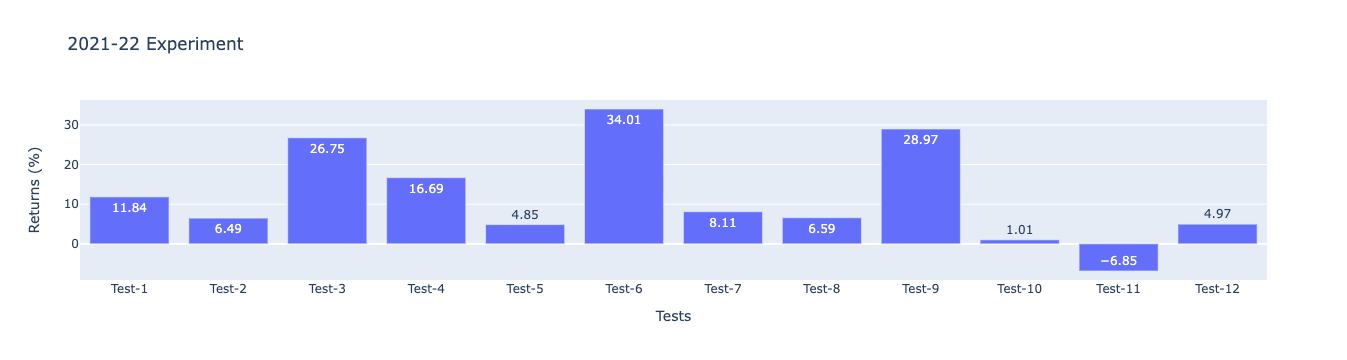

In [8]:
px.bar(df_report_2022,x=df_report_2022['Tests'],y=df_report_2022['Returns (%)'],title='2021-22 Experiment',text_auto=True)

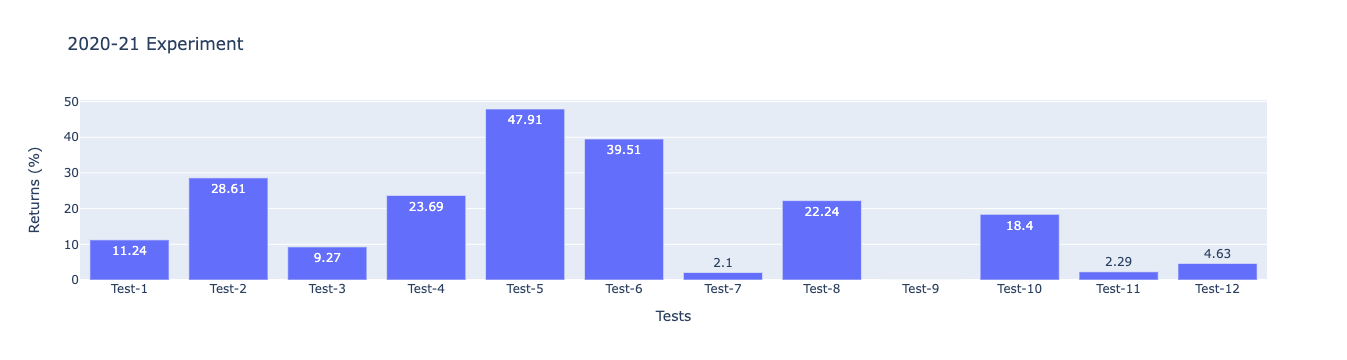

In [9]:
px.bar(df_report_2021,x=df_report_2021['Tests'],y=df_report_2021['Returns (%)'],title='2020-21 Experiment',text_auto=True)

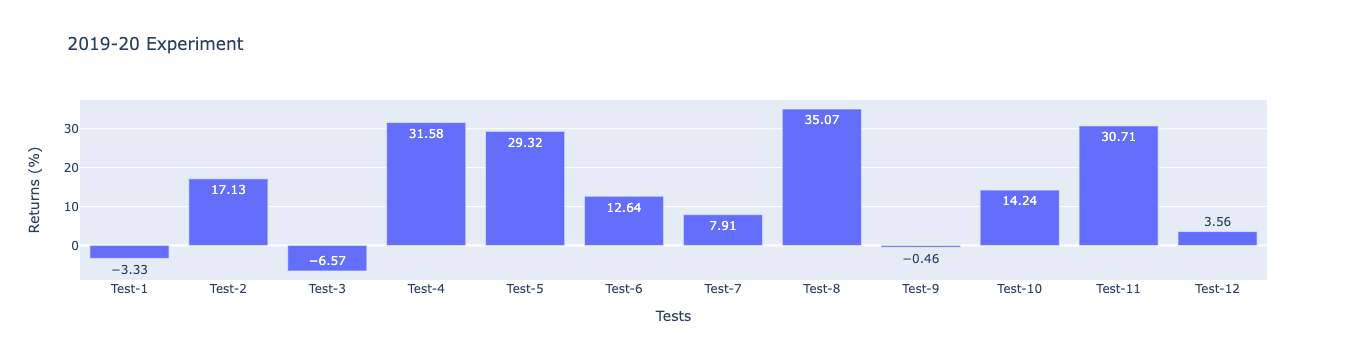

In [10]:
px.bar(df_report_2020,x=df_report_2020['Tests'],y=df_report_2020['Returns (%)'],title='2019-20 Experiment',text_auto=True)

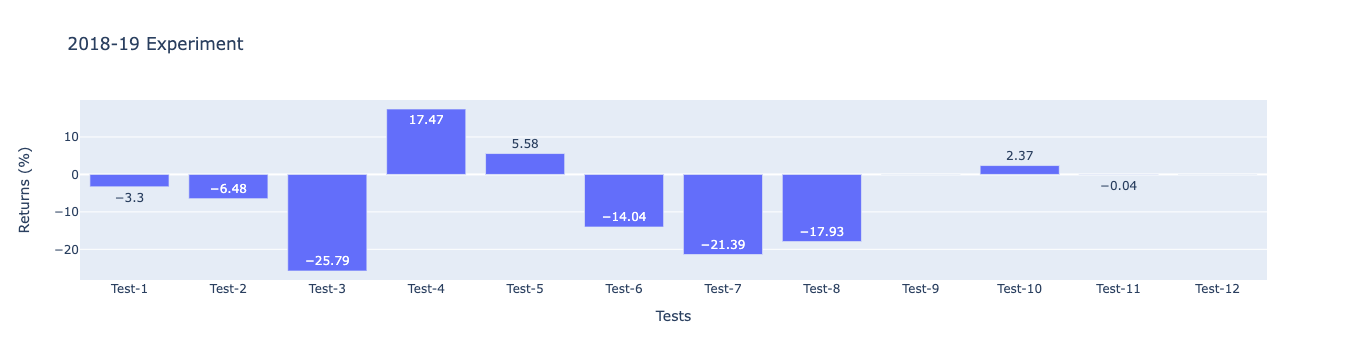

In [11]:
px.bar(df_report_2019,x=df_report_2019['Tests'],y=df_report_2019['Returns (%)'],title='2018-19 Experiment',text_auto=True)

## Obervations
* We can see that in the recent three years, the framework as provided positive returns. However, for the year 2018-19 we can witness that out framework has provided negative returns.

In [12]:
# Creating a dictionay of windows used in the Tests
windows = {'First':[40,10],
          'Second':[30,10],
          'Third':[40,20],
          'Fourth':[30,20]}
investment_period = [1,2,3]

In [13]:
# Trying to get an average returns generate for each Window throughout the experiment years

# Creating Empty List to append the findings
returns = []
std_list = []
mini_list = []
maxa_list = []

# RSI_window_list []
# breakout_window_list = []
period_list =[]
window_list = []


for window in windows:
#     print(windows[window])
    
    for period in investment_period:
#         print(period)
        df_1 =  master_report[(master_report['Investment Period']==period) & (master_report['RSI Window']==windows[window][0]) & (master_report['Breakout Window']==windows[window][1])]
        avg_return = df_1['Returns (%)'].mean()
        std_return = df_1['Returns (%)'].std()
        mini = df_1['Returns (%)'].min()
        maxa = df_1['Returns (%)'].max()        
        
        # Appending findings to the list
        period_list.append(period)
        window_list.append(windows[window])
        returns.append(round(avg_return,2))
        std_list.append(round(std_return,2))
        mini_list.append(round(mini,2))
        maxa_list.append(round(maxa,2))


In [14]:
avg_returns_report = pd.DataFrame([window_list,period_list,returns,std_list,mini_list,maxa_list],index=['Window','Period','Average Return','Std','Minimum Return','Maximum Return']).T

In [15]:
# Creating Index
indexs = ['Test-1','Test-2','Test-3','Test-4','Test-5','Test-6','Test-7','Test-8','Test-9','Test-10','Test-11','Test-12']

# Setting Indinex
avg_returns_report.set_axis(indexs,inplace=True)

In [16]:
avg_returns_report

Window Period Average Return    Std Minimum Return Maximum Return
Test-1   [40, 10]      1           4.11   8.58          -3.33          11.84
Test-2   [40, 10]      2          11.44  14.98          -6.48          28.61
Test-3   [40, 10]      3           0.92  22.41         -25.79          26.75
Test-4   [30, 10]      1          22.36    6.9          16.69          31.58
Test-5   [30, 10]      2          21.91  20.73           4.85          47.91
Test-6   [30, 10]      3          18.03  24.32         -14.04          39.51
Test-7   [40, 20]      1          -0.82   14.0         -21.39           8.11
Test-8   [40, 20]      2          11.49  22.81         -17.93          35.07
Test-9   [40, 20]      3           7.13  14.56          -0.46          28.97
Test-10  [30, 20]      1            9.0   8.63           1.01           18.4
Test-11  [30, 20]      2           6.53  16.58          -6.85          30.71
Test-12  [30, 20]      3           3.29   2.27            0.0           4.97

In [17]:
# Creating a Coefficient of Variance Columns
Cov = np.round(list(avg_returns_report['Std']/avg_returns_report['Average Return']),2) * 100
avg_returns_report['Coefficient of Variance'] = Cov
avg_returns_report

Window Period Average Return    Std Minimum Return Maximum Return  \
Test-1   [40, 10]      1           4.11   8.58          -3.33          11.84   
Test-2   [40, 10]      2          11.44  14.98          -6.48          28.61   
Test-3   [40, 10]      3           0.92  22.41         -25.79          26.75   
Test-4   [30, 10]      1          22.36    6.9          16.69          31.58   
Test-5   [30, 10]      2          21.91  20.73           4.85          47.91   
Test-6   [30, 10]      3          18.03  24.32         -14.04          39.51   
Test-7   [40, 20]      1          -0.82   14.0         -21.39           8.11   
Test-8   [40, 20]      2          11.49  22.81         -17.93          35.07   
Test-9   [40, 20]      3           7.13  14.56          -0.46          28.97   
Test-10  [30, 20]      1            9.0   8.63           1.01           18.4   
Test-11  [30, 20]      2           6.53  16.58          -6.85          30.71   
Test-12  [30, 20]      3           3.29   2.27            0.0           4.97   

         Coefficient of Variance  
Test-1                     209.0  
Test-2                     131.0  
Test-3                    2436.0  
Test-4                      31.0  
Test-5                      95.0  
Test-6                     135.0  
Test-7                   -1707.0  
Test-8                     199.0  
Test-9                     204.0  
Test-10                     96.0  
Test-11                    254.0  
Test-12                     69.0

In [18]:
avg_returns_report.to_excel('avg_returns_report.xlsx')

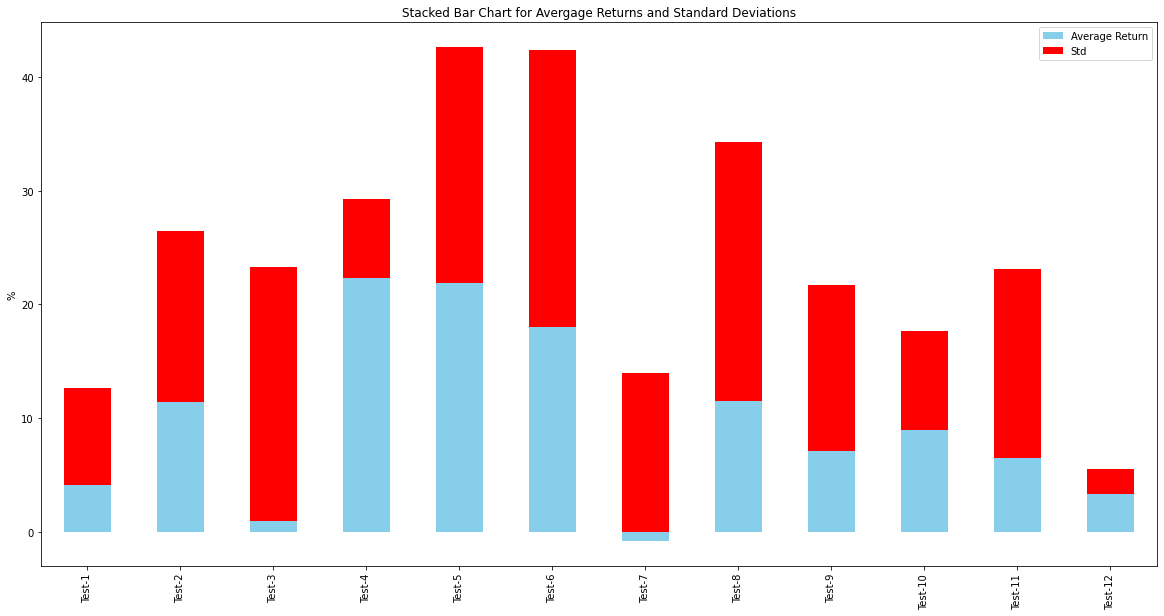

In [19]:
 # create stacked bar chart for Returns and Std
plt.rcParams["figure.figsize"] = (20,10)
avg_returns_report.drop(columns=['Period','Minimum Return','Maximum Return','Coefficient of Variance']).plot(kind='bar', stacked=True, color=['SkyBlue', 'Red'],)
# labels for x & y axis
plt.ylabel('%')
# title of plot
plt.title('Stacked Bar Chart for Avergage Returns and Standard Deviations')
plt.show()

# Observations

* Here we have taken a statics for all the tests we have done in 4 cycle. 
* There were 12 unique test that were conducted in each cycle.
* Here we have tried to group the tests and we have calcuted the mean, standard deviation, minimum return, maximum return.
* We have also calculated coefficient of variance (CoV)(a relative measure of performance) which will help us identify the best Test Parameter.
    * The coefficient of variation is a measure of dispersion, the greater the CoV the greater the dispersion around. 
* In our case greater the CoV, more deviation in returns for a particular test case.
* Thus we want a parameters which gives the lowest CoV.
* Therefore we can see that the on an average Test-4, Which is 30 RSI Window 10 Breakout and 1 month portfolio churining, is giving the highest average returns with lowest possible deviations.